In [1]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def run_learning_network(η = 0.5e-4, T = 10.0, f=lambda x: x):

    with nengo.Network() as model:
        nd_stim = nengo.Node(nengo.processes.WhiteSignal(
            period=T, high=1.0, rms=0.5))
        ens_x = nengo.Ensemble(n_neurons=100, dimensions=1)
        ens_y = nengo.Ensemble(n_neurons=100, dimensions=1)

        ens_err = nengo.Ensemble(n_neurons=100, dimensions=1)
        ens_tar = nengo.Ensemble(n_neurons=100, dimensions=1)

        nengo.Connection(nd_stim, ens_x)
        nengo.Connection(nd_stim, ens_tar, function=f)
        nengo.Connection(ens_tar, ens_err, transform=-1.0)
        nengo.Connection(ens_y,   ens_err, transform= 1.0)

        con = nengo.Connection(ens_x, ens_y,
                               learning_rule_type=nengo.PES(learning_rate=η),
                               transform=np.zeros((1, 1)))
        nengo.Connection(ens_err, con.learning_rule)

        p_x = nengo.Probe(ens_x, synapse=10e-3)
        p_y = nengo.Probe(ens_y, synapse=10e-3)
        p_err = nengo.Probe(ens_err, synapse=10e-3)
        p_tar = nengo.Probe(ens_tar, synapse=10e-3)

    with nengo.Simulator(model) as sim:
        sim.run(T)
        ts = sim.trange()

    return ts, sim.data[p_x], sim.data[p_y], sim.data[p_err], sim.data[p_tar]

In [82]:
def plot_learning_network(η = 0.5e-4, T = 10.0, f=lambda x: x):
    ts, xs, ys, errs, tar = run_learning_network(η, T, f)

    fig, axs = plt.subplots(2, 1, figsize=(6.5, 3.0), sharex=True)
    axs[0].plot(ts, xs, label='$x$')
    axs[0].plot(ts, ys, label='$f(x)$')
    axs[0].set_title('Input $x$ and learned $f(x)$')
    axs[0].set_ylim(-1.25, 1.25)
    axs[0].set_xlim(0, T)
    axs[0].set_ylabel('Decoded')

    axs[1].plot(ts, errs)
    axs[1].set_title('Error $\\epsilon(t)$')
    axs[1].set_ylim(-1.25, 1.25)
    axs[1].set_xlim(0, T)
    axs[1].set_ylabel('Decoded')
    axs[1].set_xlabel('Time $t$')

    fig.tight_layout()

    return fig, axs

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

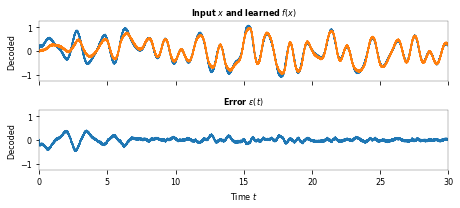

In [83]:
fig, axs = plot_learning_network(T=30.0)
fig.savefig('../pes_communication_channel_example.pdf', bbox_inches='tight', transparent=True)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

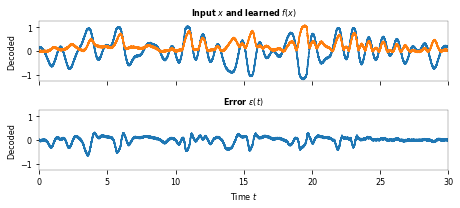

In [84]:
fig, axs = plot_learning_network(f=lambda x: x**2, T=30.0)
fig.savefig('../pes_square_example.pdf', bbox_inches='tight', transparent=True)